In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def create_file(file_name):
    f = open(file_name, "r")
    file_info = []
    for i in f:
        file_info.append(i.split())
    return file_info

In [3]:
def find_elbow(data, theta):

    # make rotation matrix
    co = np.cos(theta)
    si = np.sin(theta)
    rotation_matrix = np.array(((co, -si), (si, co)))

    # rotate data vector
    rotated_vector = data.dot(rotation_matrix)

    # return index of elbow
    return np.where(rotated_vector == rotated_vector[:, 1].min())[0][0]

In [5]:
df = pd.DataFrame(data=create_file, columns=["test 1", "test 2"])
df

ValueError: DataFrame constructor not properly called!

In [6]:
def get_data_radiant(data):
  return np.arctan2(data[:, 1].max() - data[:, 1].min(), 
                    data[:, 0].max() - data[:, 0].min())

In [7]:
voltage = [500.7, 549.0, 600.5, 649.7, 699.2, 750.5, 665.3, 680.0, 725.3]
muon_number = [573, 1409, 1867, 2272, 4369, 14145, 2631, 2926, 7563]

37
[ 670.29591837 2710.41523576]


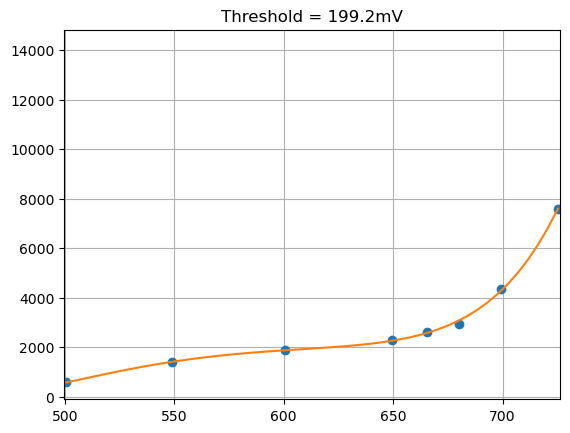

In [8]:
plt.title('Threshold = 199.2mV')
plt.scatter(voltage, muon_number, marker='+')

x = voltage
y = muon_number

z = np.polyfit(x, y, 6)
f = np.poly1d(z)

x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.grid()

data = []
for i in range(len(x_new)):
    data.append([x_new[i], y_new[i]])
data = np.array(data)

elbow_index = find_elbow(data, get_data_radiant(data))

print(elbow_index)        # 10
print(data[elbow_index])  # array([11, 64])

31
[ 691.49183673 3008.06025343]


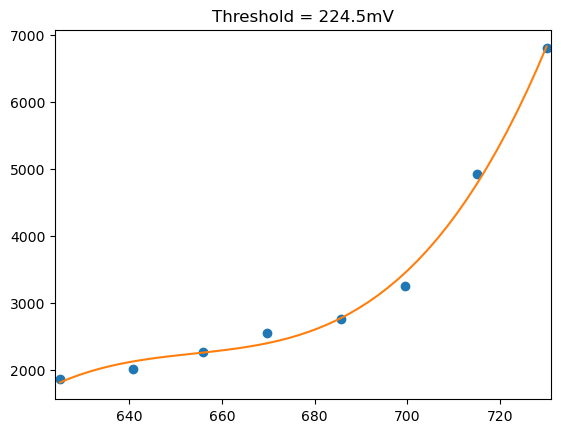

In [9]:

voltage = [625.0, 640.8, 656.0, 669.8, 685.6, 699.6, 715.1, 730.1]
muon_number = [1861, 2009, 2265, 2556, 2766, 3260, 4920, 6794]
plt.title('Threshold = 224.5mV')
plt.scatter(voltage, muon_number, marker='+')
plt.grid()

x = voltage
y = muon_number

z = np.polyfit(x, y, 3)
f = np.poly1d(z)

x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.grid()

data = []
for i in range(len(x_new)):
    data.append([x_new[i], y_new[i]])
data = np.array(data)

elbow_index = find_elbow(data, get_data_radiant(data))

print(elbow_index)        # 10
print(data[elbow_index])  # array([11, 64])

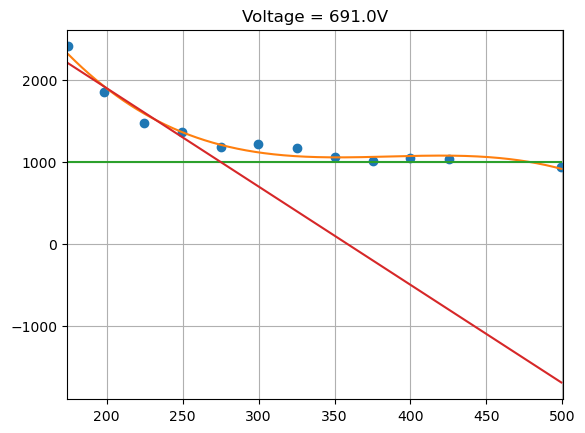

499
[499.3        915.51324566]


In [10]:
threshold = [174.8, 198.2, 224.7, 249.7, 275.0, 299.4, 325.3, 350.0, 375.3, 399.8, 425.3, 499.3]
muon_number = [2409, 1855, 1477, 1367, 1180, 1213, 1175, 1059, 1013, 1048, 1031, 941]
plt.title('Voltage = 691.0V')


x = threshold
y = muon_number

z = np.polyfit(x, y, 3)
f = np.poly1d(z)

x_new = np.linspace(x[0], x[-1], 500)
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])

data = []
for i in range(len(x_new)):
    data.append([x_new[i], y_new[i]])
data = np.array(data)

elbow_index = find_elbow(data, get_data_radiant(data))

a = 0
b = -12

const1 = 994
const2 = 4300

y1 = a*x_new + const1
y2 = b*x_new + const2

plt.plot(x_new, y1)
plt.plot(x_new, y2)

plt.scatter(threshold, muon_number, marker='+')
plt.grid()

plt.show()

print(elbow_index)        # 10
print(data[elbow_index])  # array([11, 64])